# Group 18 - Sentiment Analysis 

Group members:
1. Shreya Natarajan
2. Isha Mahendra
3. Atul Singh

## Part A - Keyword Selection and Data Collection


In [26]:
#installing tweepy
!pip install tweepy

In [27]:
#importing tweepy
import tweepy

###  Importing `TwitterCollector` and Activating an Instance

In [28]:
# importing TwitterCollector
from TwitterCollector import TwitterCollector

# importing datetime to specify the collection time window
from datetime import datetime

Now we need to initialize a `TwitterCollector` instance with the credentials (`Bearer token`) that was obtained from Twitter Developer Account.

In [29]:
# bearer tokens details
bearer_token_1 = r"AAAAAAAAAAAAAAAAAAAAAKQfhgEAAAAAS5rvfTRNPnoBIESk2opfKi2dkWY%3D36vrmuiqsAScmonPTK1g0WLwFyCNxNOKLVzQ6wjGYPMgMh1c20"
bearer_token_2 = r"AAAAAAAAAAAAAAAAAAAAAJkhhwEAAAAA7NELBeUU00G90LVG272vrK9qGXc%3DhamF9XTASiZXt3EHuSBsfAXsOAjthwfJjF0CgiHaHsLkv0YOMd"

bearer_tokens = [bearer_token_1, bearer_token_2]

# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token = bearer_token_2)

###  Searching Queries

To specify what Tweets we are looking for when collecting tweets through the API for our topic - iphone 14, we have created the following 5 queries.

In [30]:
query1 = 'iphone lang:en'  # tweets containing the word 'iphone' in English language
query2 = 'iphone apple lang:en'  # tweets containing 'iphone' and '14' at the same time, in English
query3 = '"iphone 14" lang:en OR apple lang:en' # tweets containing 'iphone' or 'apple' in English
query4 = '"iphone 14" lang:en'  # tweets containing the exact phrase: "iphone 14" in English
query5 = 'iphone14 -is:retweet lang:en'  # tweets containing 'iphone', written in English, and excluding retweets


### Tweets collection

`TwitterCollector` has two methods for tweet collection:

- `fetch_recent_tweets` helps you get recent tweets posted up to 7 days ago.
- `fetch_stream_tweets` helps you get realtime tweets that people around the world is posting right now. The speed of this method totally depends on the popularity of the selected keyword. Be very careful with your search term and the number of tweets you hope to collect!

We have used 'fetch_recent_tweets' for collecting tweets for the one week timeframe - from September 26, 2022 to October 02, 2022. <br>
We have divided the total 10,000 tweets equally between the 5 queries and saved it in 5 json files.

In [ ]:
#2000 tweets from Query 1
recent_tweets = tc.fetch_recent_tweets(query = query1  # specify the search query
                                        , tweets_cnt = 2000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , save_dir = 'sample_data'  # the file will be saved in this directory
                                        , file_name = 'iphone_query1.json'  # this will be the file name
                                        , start_time = datetime.fromisoformat('2022-09-26 14:00:00')  # starting time for tweet collection, must be within 7 days
                                        , end_time = datetime.fromisoformat('2022-10-02 18:00:00')  # ending time for tweet collection, must be within 7 days
                                        )

In [ ]:
#2000 tweets from Query 2
recent_tweets = tc.fetch_recent_tweets(query = query2  # specify the search query
                                        , tweets_cnt = 2000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , save_dir = 'sample_data'  # the file will be saved in this directory
                                        , file_name = 'iphone_query2.json'  # this will be the file name
                                        , start_time = datetime.fromisoformat('2022-09-26 14:00:00')  # starting time for tweet collection, must be within 7 days
                                        , end_time = datetime.fromisoformat('2022-10-02 18:00:00')  # ending time for tweet collection, must be within 7 days
                                        )

In [ ]:
#2000 tweets from Query 3
recent_tweets = tc.fetch_recent_tweets(query = query3  # specify the search query
                                        , tweets_cnt = 2000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , save_dir = 'sample_data'  # the file will be saved in this directory
                                        , file_name = 'iphone_query3.json'  # this will be the file name
                                        , start_time = datetime.fromisoformat('2022-09-26 14:00:00')  # starting time for tweet collection, must be within 7 days
                                        , end_time = datetime.fromisoformat('2022-10-02 18:00:00')  # ending time for tweet collection, must be within 7 days
                                        )

In [ ]:
#2000 tweets from Query 4
recent_tweets = tc.fetch_recent_tweets(query = query4  # specify the search query
                                        , tweets_cnt = 2000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , save_dir = 'sample_data'  # the file will be saved in this directory
                                        , file_name = 'iphone_query4.json'  # this will be the file name
                                        , start_time = datetime.fromisoformat('2022-09-26 14:00:00')  # starting time for tweet collection, must be within 7 days
                                        , end_time = datetime.fromisoformat('2022-10-02 18:00:00')  # ending time for tweet collection, must be within 7 days
                                        )

In [ ]:
#2000 tweets from Query 5
recent_tweets = tc.fetch_recent_tweets(query = query5  # specify the search query
                                        , tweets_cnt = 2000  # specify the number of tweets you want to collect
                                        , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                        , save_dir = 'sample_data'  # the file will be saved in this directory
                                        , file_name = 'iphone_query5.json'  # this will be the file name
                                        , start_time = datetime.fromisoformat('2022-09-26 14:00:00')  # starting time for tweet collection, must be within 7 days
                                        , end_time = datetime.fromisoformat('2022-10-02 18:00:00')  # ending time for tweet collection, must be within 7 days
                                        )

### Merging the Json files and creating Pandas Dataframe

In this step we have merged all the 5 json files for each query, into one file. <br>
We have also created a Pandas Dataframe from the merged Json file for furthur analysis.

In [3]:
import json
import pandas as pd

json_files = ['sample_data/iphone_query1.json', 'sample_data/iphone_query2.json', 'sample_data/iphone_query3.json', 'sample_data/iphone_query4.json', 'sample_data/iphone_query5.json'];

#compiling data from the various json files
all_tweets = []
for file in json_files:
    with open(file, 'r') as f:
      data = json.load(f)
    all_tweets.extend(data['tweets']);

#defining data frame colums from the json compiled file    
sanitized_tweets = []

for tweet in all_tweets:
    sanitized_tweet = {};
    sanitized_tweet['source'] = tweet['source'];
    sanitized_tweet['author_id'] = tweet['author_id']; #used for author information
    sanitized_tweet['created_at'] = tweet['created_at'];
    sanitized_tweet['lang'] = tweet['lang'];
    sanitized_tweet['id'] = tweet['id'];
    sanitized_tweet['text'] = tweet['text'];
    sanitized_tweet['possibly_sensitive'] = tweet['possibly_sensitive'];
    #public metrics columns
    sanitized_tweet['retweet_count'] = tweet['public_metrics']['retweet_count'];
    sanitized_tweet['reply_count'] = tweet['public_metrics']['reply_count'];
    sanitized_tweet['like_count'] = tweet['public_metrics']['like_count'];
    sanitized_tweet['quote_count'] = tweet['public_metrics']['quote_count'];
    sanitized_tweets.append(sanitized_tweet);

In [4]:
# creating data from from the compiled data
import json
import pandas as pd

with open('sanitized_tweets.json', 'w') as json_file:
  json.dump(sanitized_tweets, json_file)

#storing data to a .csv file
df = pd.read_json('sanitized_tweets.json')
df.to_csv('iphone_tweets.csv')

### Collecting Author information for the Author IDs

In [5]:
import time
unique_author_ids = df.author_id.unique()
unique_author_id_list = list(unique_author_ids)

#defining a for loop to get author information from the author ids
author_details = []
count_failed = 0 # to keep a count of failed requests 

for author in unique_author_id_list:
    try:
        author_detail = tc.fetch_author_info(author) #fetches author information for the author id
        author_details.append(author_detail)
    except tweepy.TooManyRequests:        
        time.sleep(15 * 60) #pauses code execution for 15 minutes when too many requests
    except:
        count_failed += 1
    
#storing the data for author information into a json file     
with open("author_details_succeeded.json", "w") as json_file:
    json.dump(author_details, json_file)            


NameError: name 'tweepy' is not defined

In [ ]:
print(count_failed) #collecting count for the authors for whom we failed to get information
author_df = pd.read_json('author_details_succeeded.json')
author_df

## Part B - Preliminary Analysis

In [ ]:
#saving the tweets into text file for furthur analysis
df['text'].to_csv('sample_data/iphone_tweets.txt', header=None, index=None, sep=' ', mode='a')

In [6]:
# import nltk package
import nltk

# tokenize text file with nltk
with open('sample_data/iphone_tweets.txt', encoding='utf-8') as f:
    words = nltk.word_tokenize(f.read().lower())

In [7]:
print(len(words))
print(type(words))
print(words[0:10])

302030
<class 'list'>
['``', 'rt', '@', 'closecalls7', ':', 'spiders', 'can', 'see', 'the', 'invisible']


In [16]:
#importing Counter 
from collections import Counter

c = Counter(words)
c.most_common(20)

[("''", 19747),
 ('#', 15266),
 (':', 13986),
 ('@', 9785),
 ('https', 7430),
 ('iphone', 7059),
 ('.', 4786),
 ('rt', 4712),
 ('the', 4619),
 (',', 4397),
 ('apple', 3860),
 ('to', 3643),
 ('14', 3394),
 ('!', 2812),
 ('a', 2789),
 ('and', 2704),
 ('for', 2518),
 ('iphone14', 1967),
 ('i', 1936),
 ('you', 1925)]

### 1) Most common words - With and Without Stop words

In [9]:
#importing pickle for text analysis
import pickle
with open('data/stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)

    
    


In [53]:
more_words = ['t.co',"'s","''","``",'https','t.','.co',' co','co ',' t' ,'t ','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","","rt","new","get"]
with open('data/stopwords.pkl','wb') as f:
    pickle.dump(more_words,f)
with open('data/stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)

In [54]:
print(type(stopwords), len(stopwords), stopwords, sep="\n")

<class 'list'>
194
['t.co', "'s", "''", '``', 'https', 't.', '.co', ' co', 'co ', ' t', 't ', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more'

In [55]:
words2 = [] # our accumulator list

for w in words:
    if w not in stopwords and len(w) > 1:
        words2.append(w)


print(len(words2))
print(words2)
print(type(words2))


141487
['closecalls7', 'spiders', 'see', 'invisible', 'laser', 'iphone', 'lidar', 'camera', '😲🤔', '//t.co/agkyrjlymo', 'like', 'nflplus', 'keeps', 'backing', 'game', 'go', 'full', 'screen', 'iphone', 'cmon', 'nfl', 'gyaigyimii', 'kalyjay', 'photography', 'thirzamaima', 'shot', 'iphone', '//t.co/xcy48wakjo', 'ayezeecasino', 'giveaway', 'alert', 'tweet', 'tag', 'friends', 'additional', 'entries', 'gt', '//t.co/f9csqqkd9i', 'winners…', 'ayezeecasino', 'giveaway', 'alert', 'tweet', 'tag', 'friends', 'additional', 'entries', 'gt', '//t.co/f9csqqkd9i', 'winners…', 'miyake9', 'thank', 'god', 'iphone', 'live', 'photos', 'managed', 'capture', 'moment', 'seb', 'cutest', '\U0001faf0🏻💚', '//t.co/87gmylek2u', 'cuitter', 'iphone', '//t.co/77to8d9yun', 'sofiabarbii', 'booty', 'iphone', '14', 'pro', 'max', '//t.co/surgwt221u', 'n3wjeanss', 'newjeans', 'commercial', 'skt', 'iphone', '14', 'pro', 'surpassed', '1m', 'views', '❤️\u200d🔥', 'lt', 'link', '//t.co/4ldp2wbwci', 'gt', '//t.co…', 'mista_helter',

In [31]:
d = Counter(words2)
d.most_common(20)

[('iphone', 7059),
 ('apple', 3860),
 ('14', 3394),
 ('iphone14', 1967),
 ('pro', 1776),
 ('amp', 840),
 ('max', 815),
 ('app', 696),
 ('giveaway', 676),
 ('screen', 578),
 ('one', 561),
 ('win', 557),
 ('gt', 523),
 ('free', 518),
 ('go', 489),
 ('phone', 487),
 ('iphone14pro', 480),
 ('best', 429),
 ('tweet', 421),
 ('glass', 420)]

In [45]:

#with open('data/word_file.txt', 'w') as fp:
    #for item in words2:
         #write each item on a new line
        #fp.write(f"{item}\n")

#import pickle
#with open('data/word_file.txt', 'wb') as fp:
    #pickle.dump(words2, fp)

common words including stop words


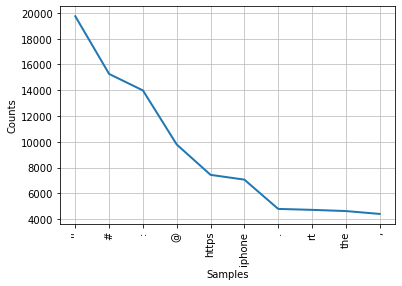

In [12]:
#top 10 words including stop words
freq1 = nltk.FreqDist(words)
print('common words including stop words')
freq1.plot(10);

common words excluding stop words


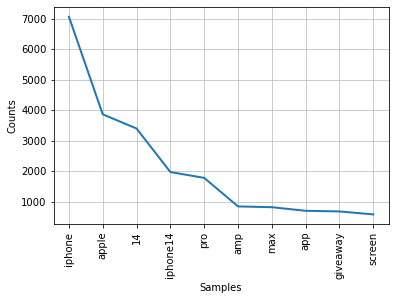

In [32]:
#top 10 words excluding stop words
freq2 = nltk.FreqDist(words2)
print('common words excluding stop words')
freq2.plot(10);

### 2) Top 10 Most Popular Hashtags 

In [64]:
string_of_tweets = ' '.join(df['text'])
type(string_of_tweets)

str

In [65]:
# function to print all the hashtags in a text 
#Borrowed from : https://www.geeksforgeeks.org/python-extract-hashtags-from-text/

def extract_hashtags2(text):
     
    # initializing hashtag_list variable
    hashtag_list = []
     
    # splitting the text into words
    for word in text.split():
         
        # checking the first character of every word
        if word[0] == '#':
             
            # adding the word to the hashtag_list
            hashtag_list.append(word[1:])
     
    # printing the hashtag_list
    return hashtag_list

In [68]:
Hashtags = extract_hashtags2(string_of_tweets)
print(Hashtags)

['NFLPlus', 'NewJeans', 'BlackAppleShop', 'MCIMUN', 'LEEAVL', 'AVFC', 'LUFC', 'MCIMUN', 'European', 'Tshirt', 'printondemand', 'uk', 'USA', 'shopping', 'fashion', 'football', 'FIFA23', 'tshirtprinting', 'redbubble', 'iPhone14', 'RBandME:', 'findyourthing', 'redbubble', 'TruVybeRadio', 'Respect.', 'iPhone14Pro', 'iOS16', 'ios', 'PrivacyoniPhone', 'CULT', 'CULTDAO…', '1', 'Amazon', 'PrivacyoniPhone', 'dreamfacereveal', 'phonecase', '淡色女子', '淡色', 'iPhone', 'iPhone14', 'iPhone14Pro', 'iPhone14ProMax', 'iPhoneケース', 'nofilter', 'eBay', 'TRACER', 'running', 'M2E', 'TRACERRU', 'NEAR', 'PolygonNFT', 'accessories', 'office', 'art', 'artfalaxy', 'desk', 'galaxy', 'ipad', 'iphones', 'laptop', 'mag…', 'deals', 'amazon', 'free', 'BoycottFlipkart', 'BoycottFlipkartSale', 'TruVybeRadio', 'beautiful', 'unseen', 'Himachal', 'Palampur', 'MANIFESTO_IN_US', 'ENHYPEN', 'deals', 'amazon', 'free', 'iPhone14Pro', 'iOS16', 'ios', 'MobileXpression', '1', 'chargers', 'airdrops.', 'airdrop', '#Android', 'Communica

In [ ]:
freq_hashtags = nltk.FreqDist(Hashtags)
print('common words without stop words')
freq_hashtags.plot(10);

### 3) Most frequently mentioned Usernames

In [ ]:
# function to print all the hashtags in a text
def extract_usernames(text):
     
    # initializing hashtag_list variable
    username_list = []
     
    # splitting the text into words
    for word in text.split():
         
        # checking the first character of every word
        if word[0] == '@':
             
            # adding the word to the hashtag_list
            username_list.append(word[1:])
     
    # printing the hashtag_list
    return username_list

In [ ]:
username = extract_usernames(string_of_tweets)

In [ ]:
freq_usernames = nltk.FreqDist(username)
print('common words without stop words')
freq_usernames.plot(10);

### 4) Three most common sources of the tweets

In [ ]:
n = 3
df['source'].value_counts().index.tolist()[:n] #gives top three sources from the data frame column 'source'

### 5) Line chart to show the time trend of tweet counts - No. of tweets in a day

In [ ]:
df['created_at_time'] = pd.to_datetime(df['created_at']) #extracts timestamp details for the data frame
df['created_at_dates'] = df['created_at_time'].dt.strftime('%m-%d') #extracts the date from the timestamp in the specified format

In [ ]:
from collections import Counter
d = Counter(df['created_at_dates'])
y = list(d.values())

In [ ]:
print(d)

In [ ]:
x = list(d.keys())

In [ ]:
#creates a line plot showing the values on the given dates
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()


### 6) Three most influential tweets

In [36]:
pd.set_option('display.max_colwidth', None)
df['influence'] = df['quote_count'] + df['reply_count'] + df['retweet_count'] + df['like_count'] #calculating the influence score for tweets
df.nlargest(3, 'influence')[["text","influence"]] #returns the tweets from the text column in the database with the highest influence score

text  \
543   RT @nftbadger: When you drop your friend’s new iphone https://t.co/aZvg2VcdV8   
1274  RT @nftbadger: When you drop your friend’s new iphone https://t.co/aZvg2VcdV8   
1716   RT @dinosaurs1969: the new iphone is only $45.99?!?? https://t.co/yup3PZ7TPX   

      influence  
543       80587  
1274      80587  
1716      51717

### 7) 3 Most Vocal authors

In [21]:
authors_count = df.groupby(['author_id']).size().reset_index(name = 'count') #created a dataframe with author details and count for the no. of tweets

In [22]:
authors_count

author_id  count
0                    7846      1
1                   63043      1
2                  641333      1
3                  729623      1
4                  777781      1
...                   ...    ...
6845  1576629661400027136      1
6846  1576629899636641792      1
6847  1576629924625977344      2
6848  1576630629508136960      1
6849  1576630952834617344      1

[6850 rows x 2 columns]

In [23]:
sorted_author = sorted(authors_count['count'], reverse=True)[:3] #sorts the author list in the descending order

In [31]:
authors_count_list = list(authors_count['count'])
authors_count.iloc[authors_count_list.index(sorted_author[0])] #returns the author details with the highest tweet count


author_id    53741771
count             248
Name: 414, dtype: int64

In [32]:
authors_count.iloc[authors_count_list.index(sorted_author[1])]#returns the author details with the second highest tweet count

author_id    1538015280365854720
count                        103
Name: 5982, dtype: int64

In [33]:
authors_count.iloc[authors_count_list.index(sorted_author[2])] #returns the author details with the third highest tweet count

author_id    920812398612692992
count                        56
Name: 2977, dtype: int64

### 8) 3 Most Influencial Authors

In [34]:
# defining a funtion which takes in the dataframe of authors, calculates the influence score and returns authors with top 3 scores
def influential_author(df):
    influence_score = []
    for ind in df.index:
        influence = df['public_metrics'][ind]['followers_count'] + df['public_metrics'][ind]['following_count']+ df['public_metrics'][ind]['listed_count'] + df['public_metrics'][ind]['tweet_count']
        authors_data = list(df['name'])
        influence_score.append(influence)
        top3_authors = sorted(zip(influence_score,authors_data), reverse=True)[:3] 
    return top3_authors

In [35]:
influential_author(author_df)

[(26613169, 'Reuters'),
 (20738732, 'The Wall Street Journal'),
 (15403669, 'The Times Of India')]

## Part C - Word Cloud

In [1]:
!pip install wordcloud

In [35]:
# import necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [57]:

s = '\n'.join(str(x) for x in words2)
print(s)
print(type(s))


closecalls7
spiders
see
invisible
laser
iphone
lidar
camera
😲🤔
//t.co/agkyrjlymo
like
nflplus
keeps
backing
game
go
full
screen
iphone
cmon
nfl
gyaigyimii
kalyjay
photography
thirzamaima
shot
iphone
//t.co/xcy48wakjo
ayezeecasino
giveaway
alert
tweet
tag
friends
additional
entries
gt
//t.co/f9csqqkd9i
winners…
ayezeecasino
giveaway
alert
tweet
tag
friends
additional
entries
gt
//t.co/f9csqqkd9i
winners…
miyake9
thank
god
iphone
live
photos
managed
capture
moment
seb
cutest
🫰🏻💚
//t.co/87gmylek2u
cuitter
iphone
//t.co/77to8d9yun
sofiabarbii
booty
iphone
14
pro
max
//t.co/surgwt221u
n3wjeanss
newjeans
commercial
skt
iphone
14
pro
surpassed
1m
views
❤️‍🔥
lt
link
//t.co/4ldp2wbwci
gt
//t.co…
mista_helter
clear
airskin
cover
cases
tor
samsung
iphone
ksh.999
plus
free
glass
screen
protector
-0705596611
dm
thetomorrowt…
've
seen
plenty
questionable
reporting
reasons
slow
iphone
sales
none
blames
terribly
annoying
iphone
ads
amp
verizon
sheriffdancevt
also
used
android
longest
time
iphone
bette

In [47]:
#text = open('data/word_file.txt', encoding='utf-8').read()
#print(type(text))
#print(len(text))
#print(len(text.split()))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

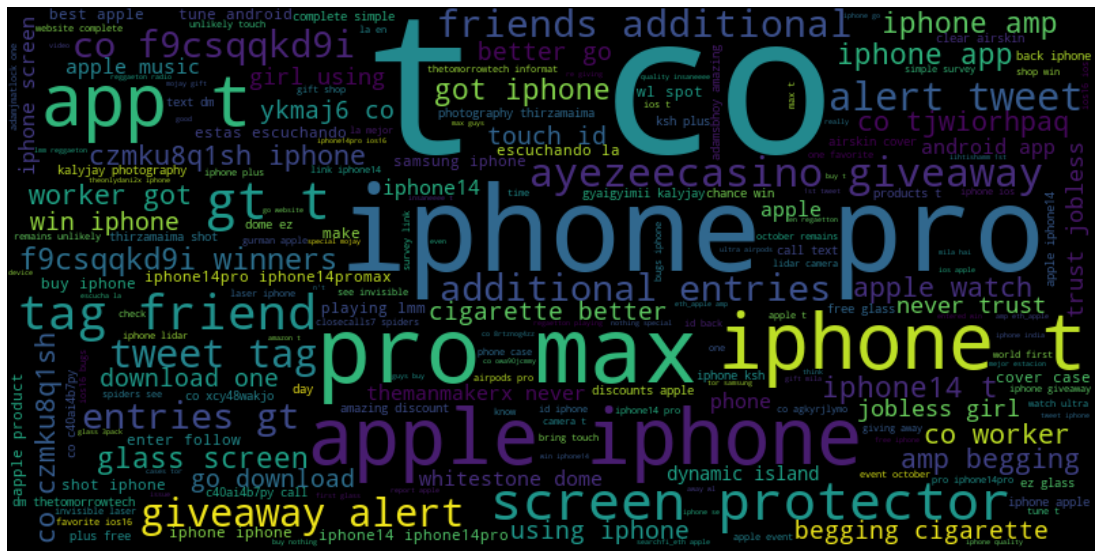

In [60]:
# lower max_font_size 
#Borrowed from : https://stackoverflow.com/questions/61953788/why-are-stop-words-not-being-excluded-from-the-word-cloud-when-using-pythons-wo
wordcloud = WordCloud(width=800, height=400,collocations =True).generate(s) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud , interpolation = "bilinear") # word cloud image show Interpolation to make the image smoother is borrowed from https://www.pluralsight.com/guides/natural-language-processing-visualizing-text-data-using-word-cloud
plt.axis("off") # turn on axis
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook